# Importing necessary libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
#load data
df = pd.read_csv('Churn-dataset.csv')

In [3]:
#show first five rows of dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#show last five rows of dataframe
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
# checking basic statistical details
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Checking  summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#checking the null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Exploratory Data Analysis

In [9]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns, axis=1)

# Display the first few rows
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 11)

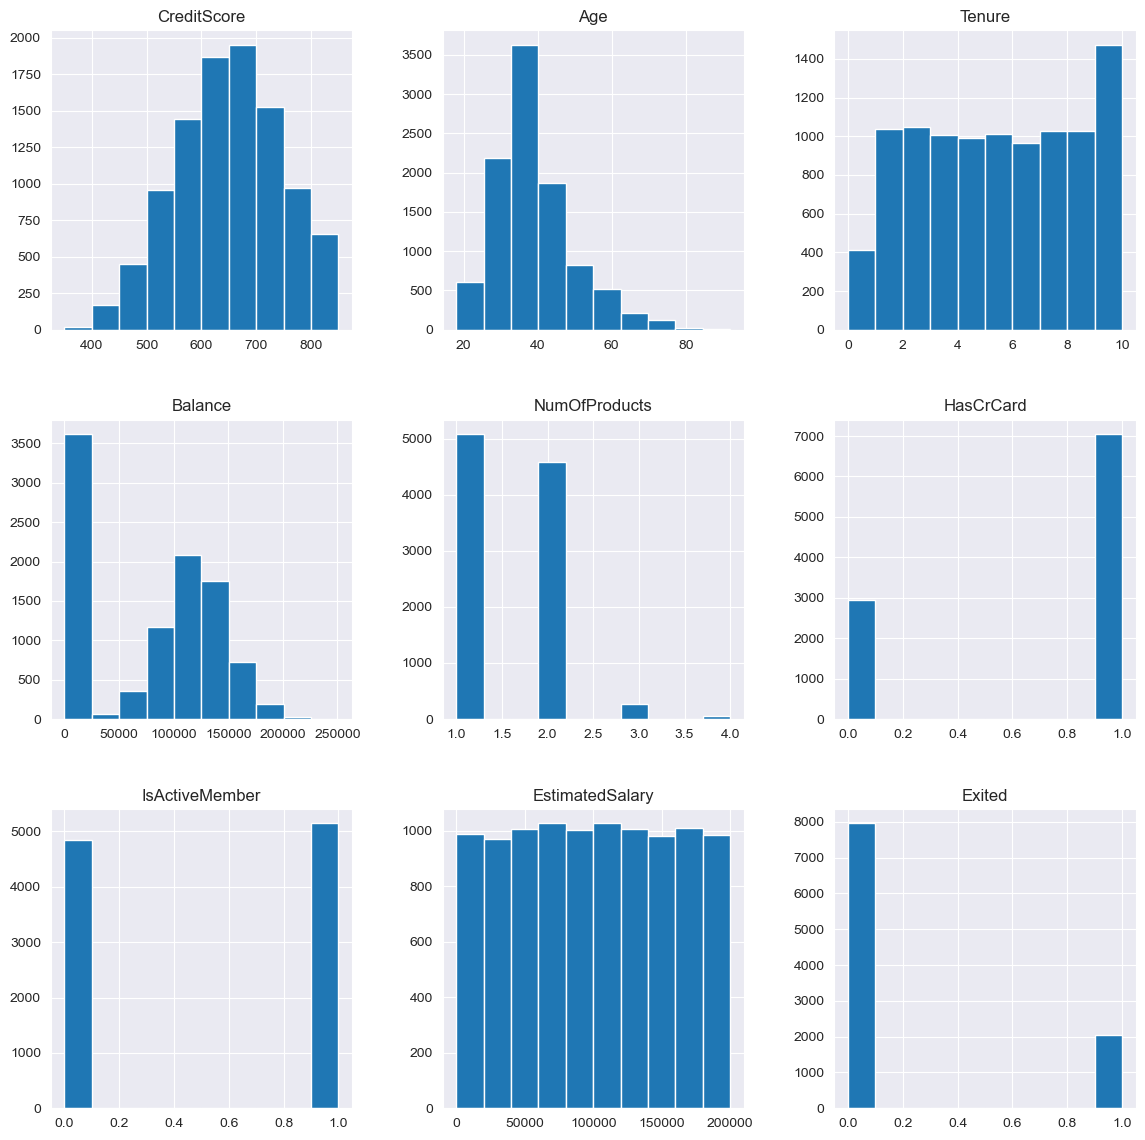

In [11]:
# Plot histogram grid
df.hist(figsize=(14,14))

plt.show()

In [12]:
# Summarize numerical features
df.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# Summarize categorical features
df.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


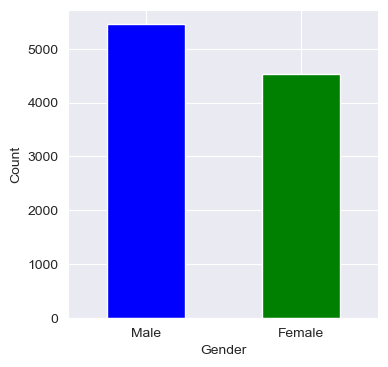

In [14]:
# Bar plot for "Gender"
plt.figure(figsize=(4,4))
df['Gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

In [15]:
# Display count of each class
Counter(df.Gender)

Counter({'Male': 5457, 'Female': 4543})

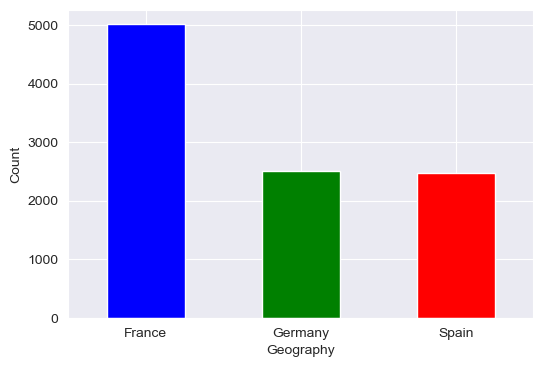

In [16]:
# Bar plot for "Geography"
plt.figure(figsize=(6,4))
df['Geography'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()

In [17]:
# Display count of each class
Counter(df.Geography)

Counter({'France': 5014, 'Germany': 2509, 'Spain': 2477})

In [18]:
#churn Segmentation by Gender¶

In [19]:
grouped = df.groupby('Gender')['Exited'].agg(Count='value_counts')
grouped

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [20]:
# Reorganize dataframe for plotting count
data = grouped
data = data.pivot_table(values='Count', index='Gender', columns=['Exited'])
data

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [21]:
# Calculate percentage within each class
data = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
data.rename(columns={'Count': 'Percentage'}, inplace=True)
data

Percentage
Gender Gender Exited            
Female Female 0            74.93
              1            25.07
Male   Male   0            83.54
              1            16.46

In [22]:
# Reorganize dataframe for plotting percentage
data = data.pivot_table(values='Percentage', index='Gender', columns=['Exited'])
data

Exited,0,1
Gender,,
Female,74.93,25.07
Male,83.54,16.46


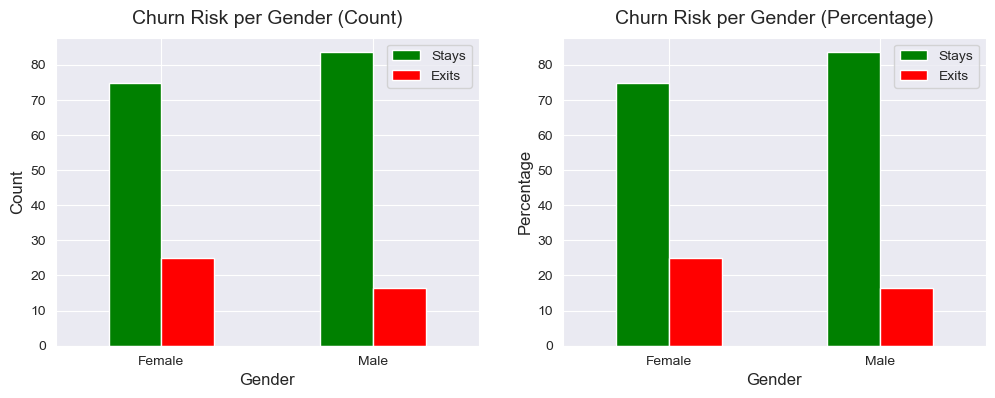

In [23]:
# Churn distribution by gender, count + percentage

labels= ['Stays', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

data.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Gender', size=12)


data.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Gender', size=12)

plt.show()


In [24]:
#Churn Segmentation by Geography¶

In [25]:
grouped = df.groupby('Geography')['Exited'].agg(Count='value_counts')
grouped

Count
Geography Exited       
France    0        4204
          1         810
Germany   0        1695
          1         814
Spain     0        2064
          1         413

In [26]:
# Reorganize dataframe for plotting count
dfs = grouped
dfs = dfs.pivot_table(values='Count', index='Geography', columns=['Exited'])
dfs

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [27]:
# Calculate percentage within each class
dfs = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfs.rename(columns={'Count': 'Percentage'}, inplace=True)
dfs

Percentage
Geography Geography Exited            
France    France    0            83.85
                    1            16.15
Germany   Germany   0            67.56
                    1            32.44
Spain     Spain     0            83.33
                    1            16.67

In [28]:
# Reorganize dataframe for plotting percentage
dfs = dfs.pivot_table(values='Percentage', index='Geography', columns=['Exited'])
dfs

Exited,0,1
Geography,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67


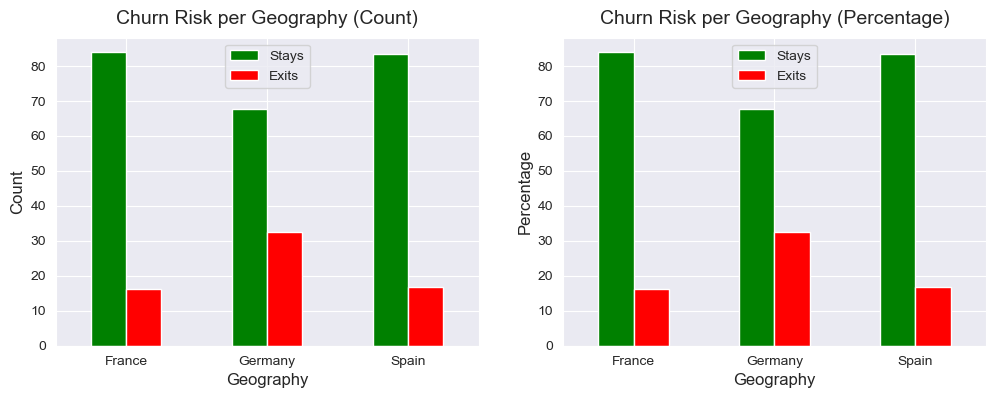

In [29]:
# Churn distribution by geography, count + percentage

labels= ['Stays', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dfs.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Geography (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Geography', size=12)


dfs.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Geography (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Geography', size=12)

plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Calculate correlations
correlations = df.corr()

# Sort features by correlation with "Exited"
if 'Exited' in correlations:
    sort_corr_cols = correlations['Exited'].sort_values(ascending=False).keys()
    print(sort_corr_cols)

Index(['Exited', 'Age', 'Balance', 'Geography', 'EstimatedSalary', 'HasCrCard',
       'Tenure', 'CreditScore', 'NumOfProducts', 'Gender', 'IsActiveMember'],
      dtype='object')


In [31]:
# sort features in order of their correlation with "Exited"
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr



,Exited,Age,Balance,Geography,EstimatedSalary,HasCrCard,Tenure,CreditScore,NumOfProducts,Gender,IsActiveMember
Exited,1.000000,0.285323,0.118533,0.035943,0.012097,-0.007138,-0.014001,-0.027094,-0.047820,-0.106512,-0.156128
Age,0.285323,1.000000,0.028308,0.022812,-0.007201,-0.011721,-0.009997,-0.003965,-0.030680,-0.027544,0.085472
Balance,0.118533,0.028308,1.000000,0.069408,0.012797,-0.014858,-0.012254,0.006268,-0.304180,0.012087,-0.010084
Geography,0.035943,0.022812,0.069408,1.000000,-0.001369,-0.008523,0.003739,0.007888,0.003972,0.004719,0.006724
EstimatedSalary,0.012097,-0.007201,0.012797,-0.001369,1.000000,-0.009933,0.007784,-0.001384,0.014204,-0.008112,-0.011421
HasCrCard,-0.007138,-0.011721,-0.014858,-0.008523,-0.009933,1.000000,0.022583,-0.005458,0.003183,0.005766,-0.011866
Tenure,-0.014001,-0.009997,-0.012254,0.003739,0.007784,0.022583,1.000000,0.000842,0.013444,0.014733,-0.028362
CreditScore,-0.027094,-0.003965,0.006268,0.007888,-0.001384,-0.005458,0.000842,1.000000,0.012238,-0.002857,0.025651
NumOfProducts,-0.047820,-0.030680,-0.304180,0.003972,0.014204,0.003183,0.013444,0.012238,1.000000,-0.021859,0.009612
Gender,-0.106512,-0.027544,0.012087,0.004719,-0.008112,0.005766,0.014733,-0.002857,-0.021859,1.000000,0.022544


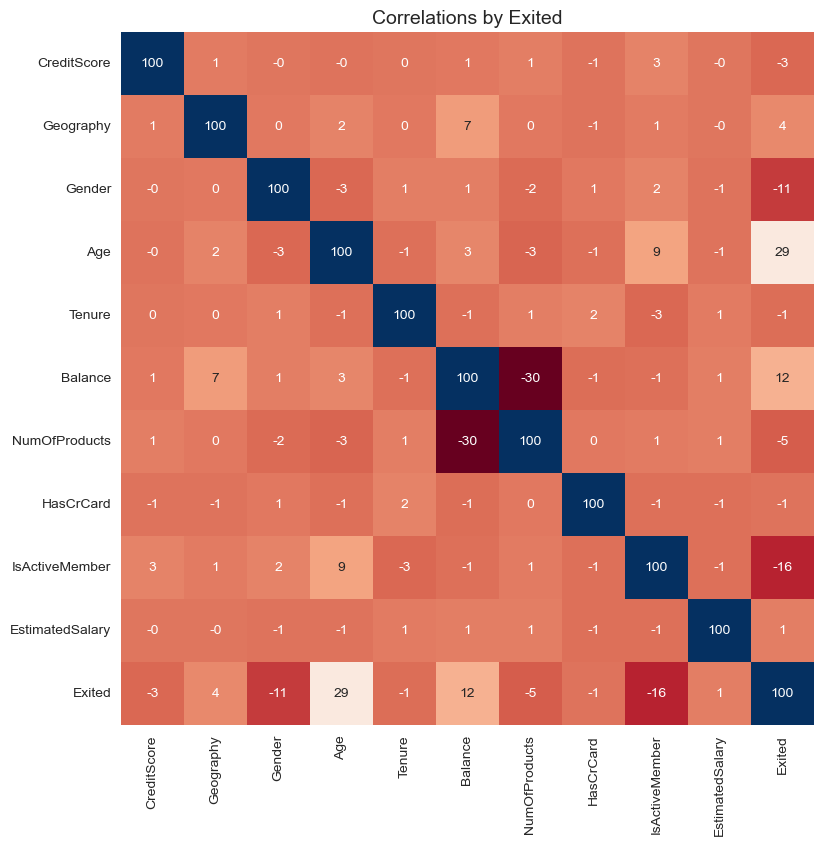

In [32]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize 9x9
plt.figure(figsize=(9,9))

sns.heatmap(
    correlations * 100,  # Scale correlations to percentages
    cmap='RdBu',
    annot=True,
    fmt='.0f',
    cbar=False,
    square=True
)

plt.title('Correlations by Exited', fontsize=14)
plt.yticks(rotation=0)
plt.show()


# Model training

In [33]:
X = df.drop('Exited', axis=1) 
y = df['Exited']

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Model evaluation

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score : 86.9 %
